**Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**This Dataset contains information of 22700+ Software Professionals with different features like their Salaries (₹), Name of the Company, Company Rating, Number of times Salaries Reported, and Location of the Company.**

In [2]:
df = pd.read_csv(r'Downloads/sfdata/Salarydata.csv')
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


$\color{blue}{\text{First let us know the data a bit more by checking its shape,info,null values etc}}$


In [3]:
df.shape

(22770, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

$\color{blue}{\text{LET US CHECK THE CITIES PRESENT IN THE DATASET}}$

In [7]:
df['Location'].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [8]:
companygrp = df.groupby(['Company Name'])

$\color{blue}{\text{WHICH COMPANIES HAVE THE HIGHEST RATING AND WHICH HAS THE LOWEST? }}$

In [9]:
companygrp['Rating'].mean().sort_values().nlargest(10)

Company Name
Acmeture                      5.0
Move78                        5.0
Implyfree                     5.0
NextApp Services              5.0
4CRisk.ai                     5.0
4lio                          5.0
Nirvanic Labs                 5.0
Rklick Solutions              5.0
Ahead WebSoft Technologies    5.0
eReinsure                     5.0
Name: Rating, dtype: float64

In [10]:
companygrp['Rating'].mean().sort_values().nsmallest(10)

Company Name
ML Books International      1.0
Manmuk Creations            1.0
Newspark Media Ventures     1.0
Tacky Root                  1.0
Ingresos                    1.0
Doctily Digital Health      1.0
i-soft software solution    1.0
Speck Systems               1.0
Neurolingua                 1.0
InnoCirc Ventures           1.0
Name: Rating, dtype: float64

$\color{blue}{\text{FIND OUT HOW MANY EMPLOYEES ARE FROM EACH CITY}}$

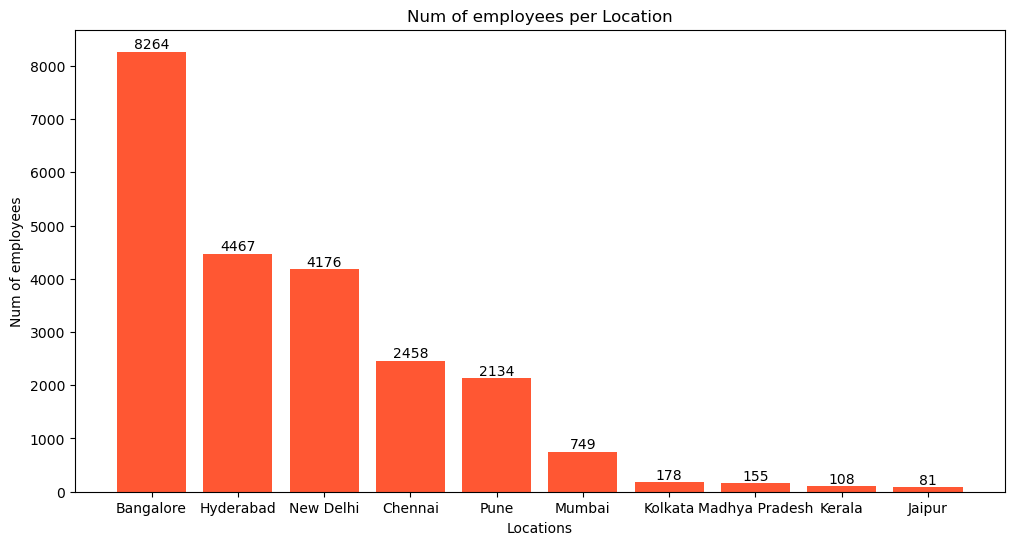

In [32]:
plt.figure(figsize=(12,6))
bars = plt.bar(df['Location'].value_counts().index, df['Location'].value_counts(), color='#FF5733')
plt.bar_label(bars)
plt.xlabel('Locations')
plt.ylabel('Num of employees')
plt.title('Num of employees per Location')
plt.show()

$\color{blue}{\text{BARPLOT BETWEEN LOCATION AND SALARY}}$

<Axes: xlabel='Location', ylabel='Salary'>

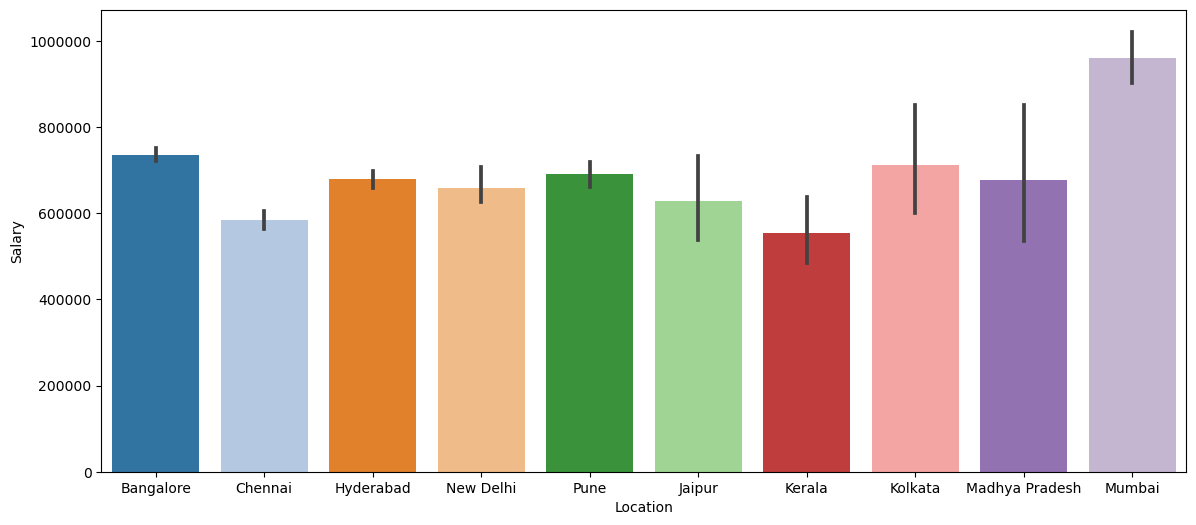

In [15]:
plt.figure(figsize=(14,6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x=df['Location'] , y= df['Salary'],palette = 'tab20')

$\color{blue}{\text{WHICH ARE THE TOP 10 MOSTLY PAID JOB TITLES?}}$

In [16]:
jobtitlegrp = df.groupby(['Job Title'])
jobtitlegrp['Salary'].mean().nlargest(10)

Job Title
Lead UI Designer, Magento Front-end Developer                   9.900000e+06
Non Software Development Engineer                               9.800000e+06
Mobile App Development                                          5.000000e+06
Front-end - Intern                                              4.900000e+06
Principal Mobile Architect                                      4.800000e+06
Front-End Architect                                             4.700000e+06
Staff Software Development Engineer                             4.466667e+06
Senior Manager Software Development Engineering                 4.233333e+06
SMTS Software Development Engineer                              4.200000e+06
Database Administrator (Database Administrator) - Contractor    4.100000e+06
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Top 10 paid Job titles')

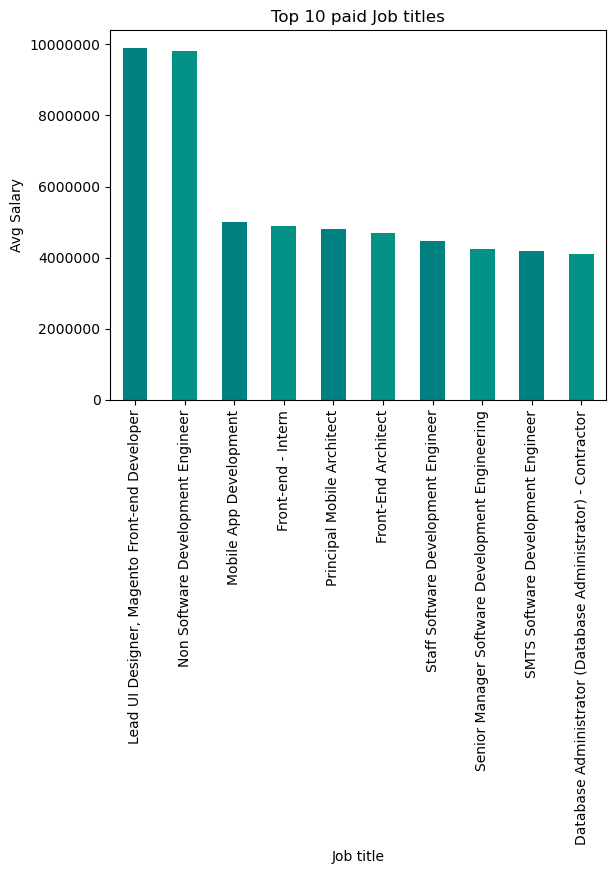

In [17]:
plt.ticklabel_format(style='plain')
jobtitlegrp['Salary'].mean().nlargest(10).plot(kind='bar',color=['#008080','#039286'])
plt.xlabel('Job title')
plt.ylabel('Avg Salary')
plt.title('Top 10 paid Job titles')

$\color{blue}{\text{WHICH JOB ROLES ARE PRESENT IN THE DATA AND WHAT IS THEIR PROPORTION?}}$

<Axes: ylabel='Job Roles'>

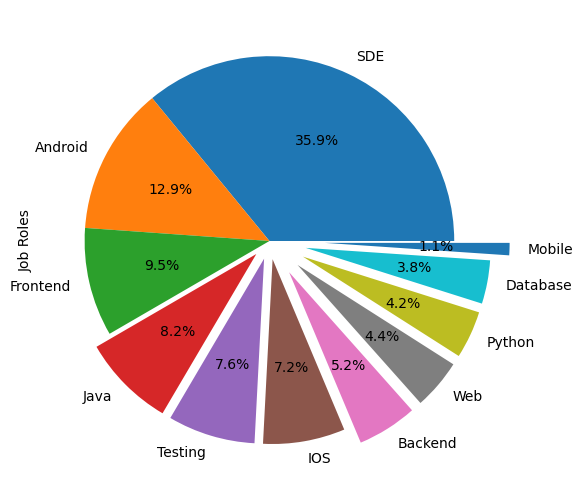

In [18]:
plt.figure(figsize=(12,6))
explode = [0,0,0,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.3]
df['Job Roles'].value_counts().plot(kind='pie',explode = explode,autopct = '%1.1f%%')

$\color{blue}{\text{Let us look at the correlation between the variables}}$

In [19]:
df.corr()

C:\Users\91751\AppData\Local\Temp\ipykernel_9168\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Salary,Salaries Reported
Rating,1.000000,0.025476,-0.011690
Salary,0.025476,1.000000,0.004481
Salaries Reported,-0.011690,0.004481,1.000000


C:\Users\91751\AppData\Local\Temp\ipykernel_9168\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

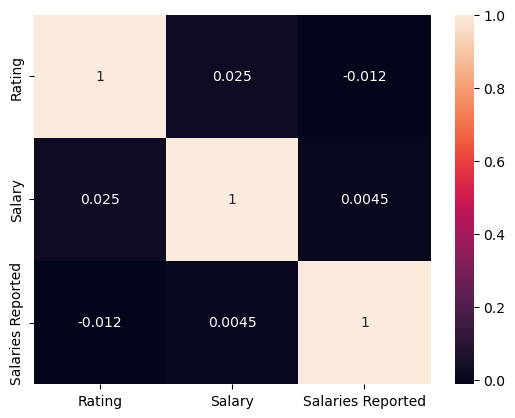

In [20]:
sns.heatmap(df.corr(),annot=True)

**We can see that there is no significant correlation between the variables**

$\color{blue}{\text{A COMPARISON BETWEEN COMPANIES AND SALARIES}}$

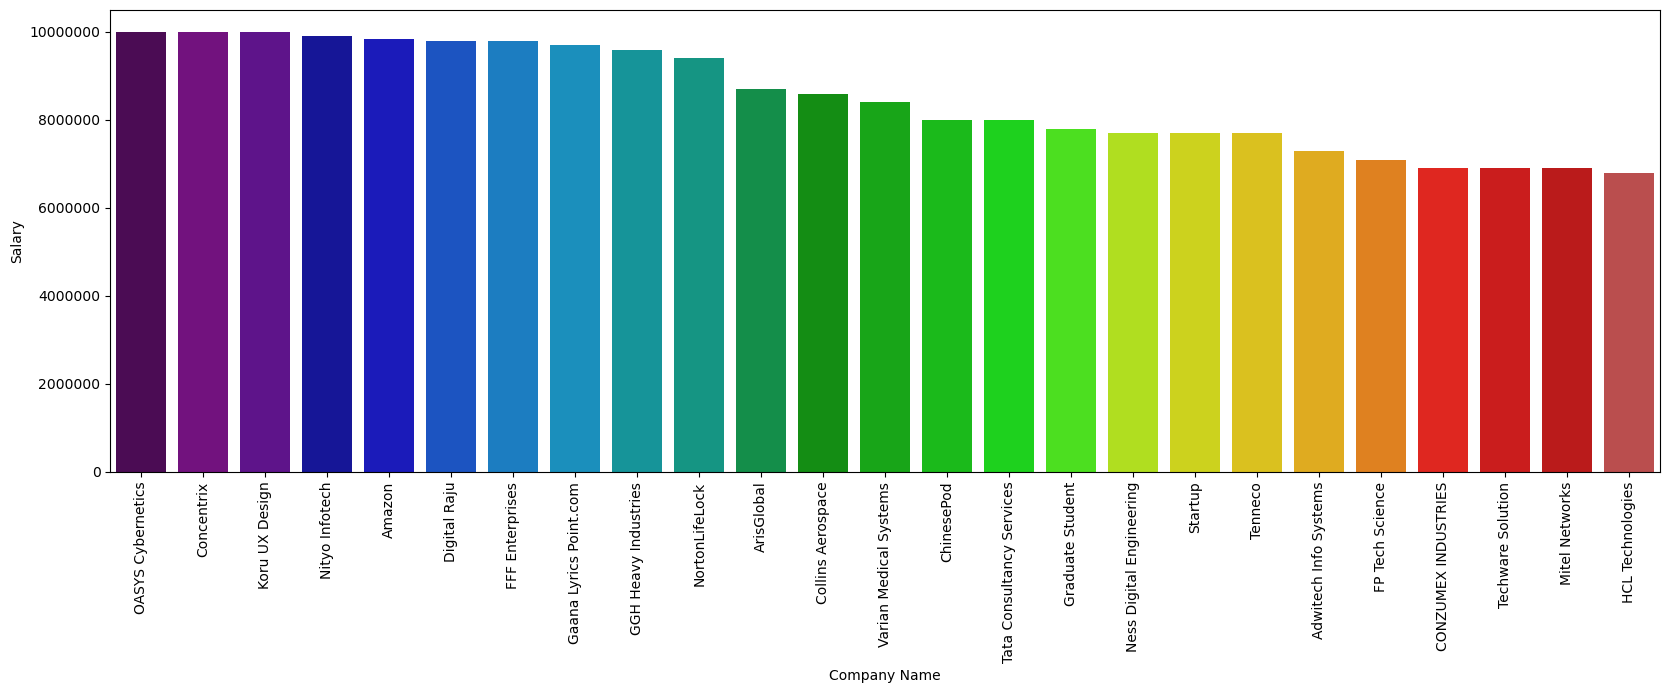

In [21]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:26],
            y = df["Salary"][1:26],
            palette = "nipy_spectral");

$\color{blue}{\text{HISTOGRAM SHOWING DISTRIBUTION OF COMPANY RATINGS}}$

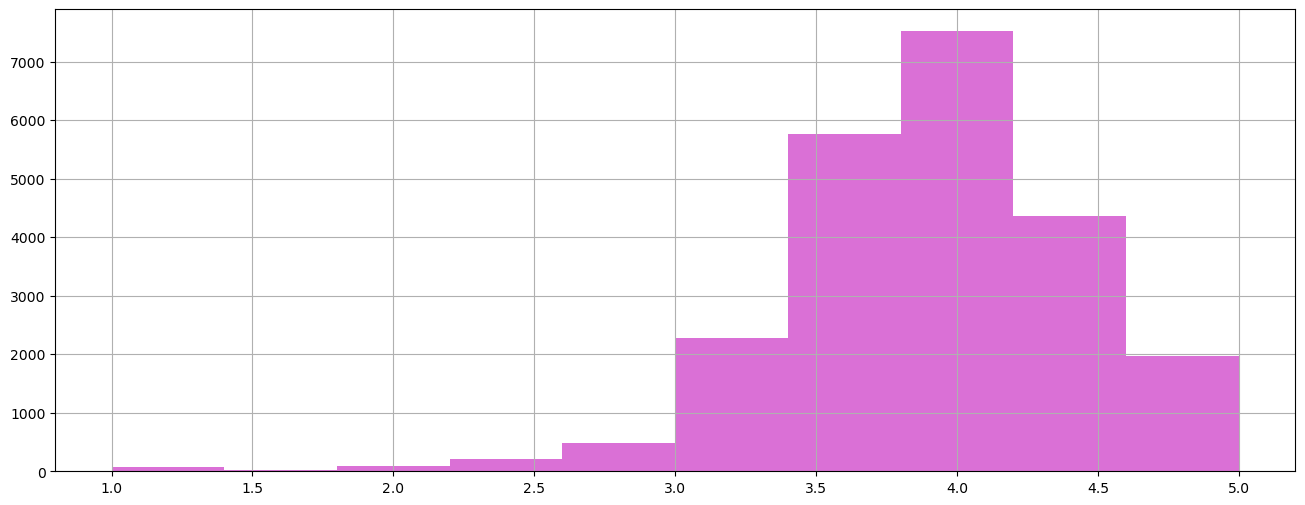

In [22]:
plt.figure(figsize=(16,6))
plt.hist(df['Rating'],color ='orchid')
plt.grid()
plt.show()

$\color{blue}{\text{FINDING OUT THE TOP 20 SALARIES AND THE COMPANIES PAYING IT}}$

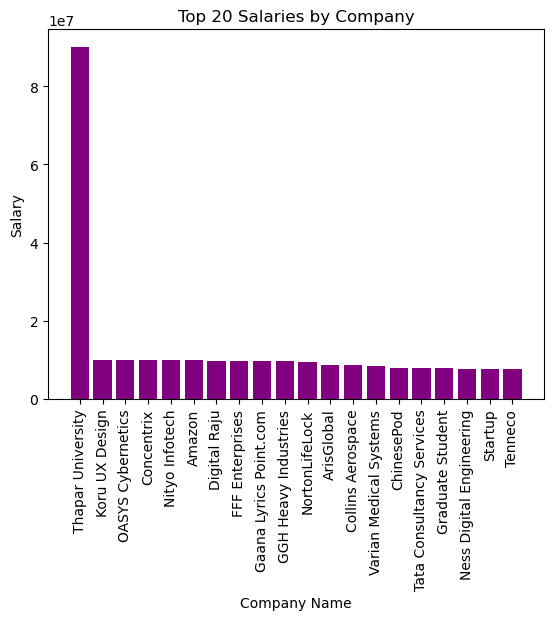

In [23]:
top_20salaries = df[['Company Name','Salary']].sort_values(by='Salary',ascending=False).head(20)
plt.bar(x =top_20salaries['Company Name'] , height=top_20salaries['Salary'],color = 'purple')
plt.xlabel('Company Name')
plt.ylabel('Salary')
plt.title('Top 20 Salaries by Company')
plt.xticks(rotation=90) 
plt.show()

**From the data we can see that there is a huge gap between the top salary and the second one, almost a 9x increase.**

$\color{blue}{\text{THIS WAS JUST A BASIC PROJECT THAT COVERED DATA VISUALIZATION IN PYTHON USING MATPLOTLIB AND SEABORN.}}$
$\color{blue}{\text{SO HAVE A GOOD DAY EVERYONE}}$